## 데이터셋

이전에 3.4.1에서 사용한 __IMDB__ 데이터셋을 사용한다.


[IMDB_MIP_sigmoid.ipynb](https://github.com/Nevation/Keras/blob/master/IMDB_MIP_sigmoid.ipynb)에 데이터셋에 대한 설명이 있다.

In [1]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

Using TensorFlow backend.


num_words=20000은 20,000번째까지 사용 빈도수가 높은 단어의 데이터셋을 가져오는 인자이다.

In [2]:
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

훈련셋과 검증셋을 분류하는 작업이다.

In [3]:
from keras.preprocessing import sequence

x_train = sequence.pad_sequences(x_train, maxlen=200)
x_val = sequence.pad_sequences(x_val, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)

Data들의 길이를 맞춰주기 위해 Dataset을 전처리를 한다.

여기서 maxlen을 200으로 설정했기 때문에, 만약 Data의 길이 (문장의 길이)가 200이 안된다면, 200까지 0으로 채우고 반대로 200을 넘길 경우 자르는 작업을 한다.

In [2]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Embedding(20000, 128, input_length=200))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.
W0805 15:41:10.537566 12712 deprecation_wrapper.py:119] From C:\Users\j2094\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 15:41:10.567550 12712 deprecation_wrapper.py:119] From C:\Users\j2094\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 15:41:10.570478 12712 deprecation_wrapper.py:119] From C:\Users\j2094\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 15:41:10.588431 12712 deprecation_wrapper.py:119] From C:\Users\j2094\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0805 15:41:10.59940

모델을 설정하는 작업이다.

모델에 관련된 패키지를 import를 한 뒤, model이라는 변수에 모델을 초기화한다.

이후 CNN모델로 초기화 한다.


1. Embedding(input_dim, output_dim, embeddings_initializer='uniform', embeddings_regularizer=None, activity_regularizer=None, embeddings_constraint=None, mask_zero=False, input_length=None)
    * 여기서 인자로 input_dim, output_dim, input_length을 사용했다.
    * __input_dim__은 데이터의 종류의 개수이며, 20,000을 대입했으니 20,000개의 데이터의 종류가 있다는 의미이다.
    * __output_dim__은 데이터를 인코딩 한 뒤에 나오는 벡터의 크기이다. 따라서 128을 대입했으니 128차원의 벡터로 반환하게 된다. (ex. [0, 0, 0, .. ,0 ,0] len이 128인 배열과 비슷하다.)
    * __input_length__는 데이터의 길이를 나타내게 된다. 여기서는 문장을 sequence를 이용해 200으로 세팅을 했으니 200을 대입하게 된다.
    
    
2. Dropout(rate, noise_shape=None, seed=None)
    * 인자로 rate을 대입해주었다.
    * 이 함수는 __과대적합__을 방지하기 위해 사용된다고 한다.
    * __rate__는 과대적합을 방지하기 위해 임의의 입력 뉴런 얼마나 drop하려고 하는지에 대한 인자이다. 
    * 여기서는 0.2를 넣었으니 20%정도 drop한다고 생각하면 된다.
    

3. Conv1D(filters, kernel_size, strides=1, padding='valid', data_format='channels_last', dilation_rate=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
    * 여기서 인자로 filters, kernel_size, padding, activation, strides를 사용했다.
    * __filter__는 들어노는 차원수를 의미하는데, 256를 대입하는 이유는 Embedding에서 256차원으로 반환(이부분 정보 부족.. 모르겠음)을 하기 때문이다.
    * 나머지는 찾았지만, 의미를 이해하기 어려워서 번역하지 않고 추가해서 남기려고 한다.
    * __kernel_size__: An integer or tuple/list of a single integer, specifying the length of the 1D convolution window.
    * __padding__: One of "valid", "causal" or "same" (case-insensitive).  "valid" means "no padding".  "same" results in padding the input such that the output has the same length as the original input. 
    * __activation__: Activation function to use (see activations). If you don't specify anything, no activation is applied
    * __strides__: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.
    

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 198, 256)          98560     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

이제 만든 모델에 대한 요약이다.

왼쪽에는 사용한 __Layer__, 중간에는 반환된 __Shpae__이 나오게 된다.

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

컴파일 설정을 해주는 함수이다.

__binary_crossentropy__: 두개의 클래스중에서 예측할때 사용하는 함수 (교차 엔트로피)


__adam__: Momentum과 RMSprop를 합친 경사 하강법 



__accuracy__:  다중클래스분류 문제에서 평가기준을 ‘accuracy’로 지정했을 경우 내부적으로 categorical_accuracy() 함수를 이용하여 정확도가 계산.

In [10]:
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 68s 3ms/step - loss: 0.1170 - acc: 0.9610 - val_loss: 0.2809 - val_acc: 0.8906
Epoch 2/25
20000/20000 [==============================] - 69s 3ms/step - loss: 0.0326 - acc: 0.9919 - val_loss: 0.3546 - val_acc: 0.8840
Epoch 3/25
20000/20000 [==============================] - 70s 3ms/step - loss: 0.0070 - acc: 0.9992 - val_loss: 0.4000 - val_acc: 0.8892
Epoch 4/25
20000/20000 [==============================] - 68s 3ms/step - loss: 0.0023 - acc: 0.9997 - val_loss: 0.4510 - val_acc: 0.8836
Epoch 5/25
20000/20000 [==============================] - 69s 3ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4583 - val_acc: 0.8910
Epoch 6/25
20000/20000 [==============================] - 69s 3ms/step - loss: 6.7136e-04 - acc: 1.0000 - val_loss: 0.4832 - val_acc: 0.8892
Epoch 7/25
20000/20000 [==============================] - 70s 4ms/step - loss: 3.3685e-04 - acc: 1.0000 - val_loss: 0.5004 - 

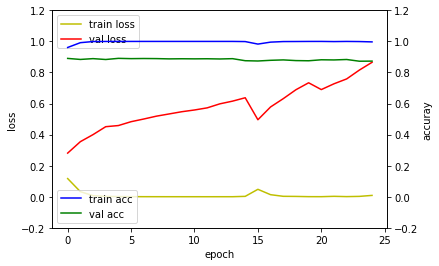

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [12]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 12s 484us/step
## evaluation loss and_metrics ##
[0.9243427164077759, 0.8646799999809265]


## 결론

- __정확도: 86.47%__
- __손실률: 92.43%__


훈련 손실률은 초반에 감소하다가 유지하는 모습을 보여주는 반면, 실제는 계속 증가하는 모습을 보여주고 있다.


또한 다른 알고리즘에 비해 훈련 정확도와 테스트 정확도의 차이가 작다.
우연일 수 도 있지만 유일하게 처음 정확도가 훈련 정확도보다 실제 정확도가 높다
